In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import os

print("--- Notebook Setup Complete. Loading Data... ---")

# Define path to go up one directory from 'notebooks' to 'data'
data_path = '../data/analyzed_reviews.csv'

# Load the data
try:
    df = pd.read_csv(data_path)
    print(f"✅ Successfully loaded 'analyzed_reviews.csv' with {len(df)} rows.")
    # Display the first few rows to confirm it looks correct
    display(df.head())
except FileNotFoundError:
    print(f"❌ ERROR: Could not find the file at {data_path}")
    print("Please make sure you have successfully run the analysis script (03) first.")

--- Notebook Setup Complete. Loading Data... ---
✅ Successfully loaded 'analyzed_reviews.csv' with 1426 rows.


,review,rating,date,bank,source,sentiment_label,sentiment_score,processed_review,themes
0,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,Commercial Bank of Ethiopia,Google Play,NEGATIVE,0.996465,atms support account account transfer like cou...,"Account & Login, Customer Support, Transactions"
1,what is this app problem???,1,2025-06-05,Commercial Bank of Ethiopia,Google Play,NEGATIVE,0.999623,app problem,General Feedback
2,the app is proactive and a good connections.,5,2025-06-05,Commercial Bank of Ethiopia,Google Play,POSITIVE,0.999868,app proactive good connection,General Feedback
3,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play,NEGATIVE,0.995335,send cbebirr app app,Transactions
4,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play,POSITIVE,0.999816,good,General Feedback



--- Generating High-Level Visualizations ---


NameError: name 'visuals_path' is not defined

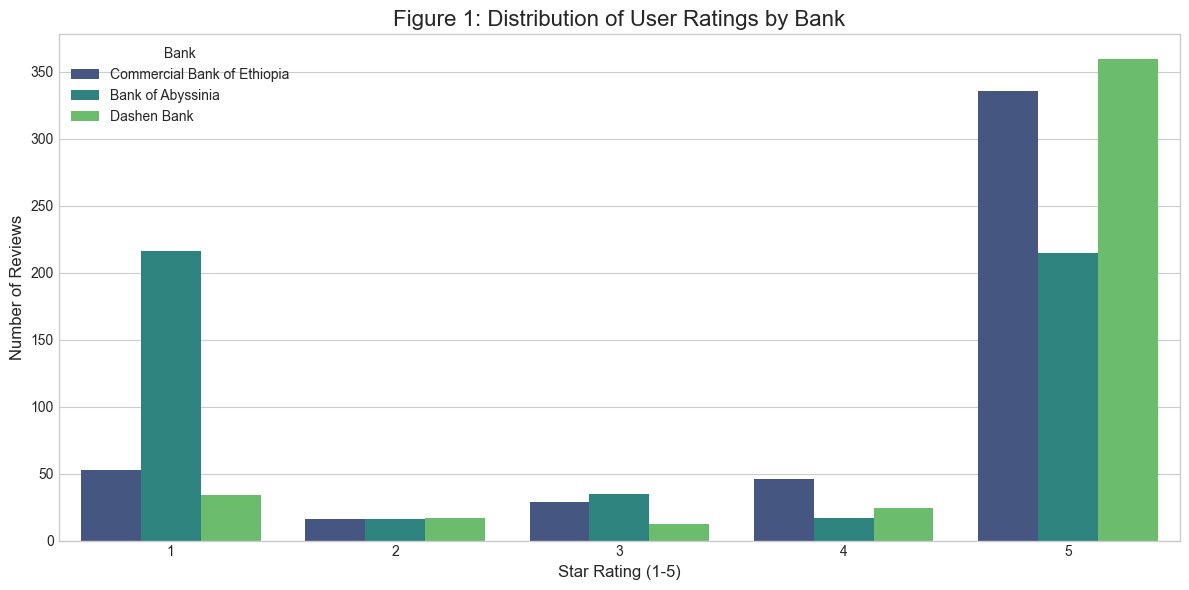

In [2]:

print("\n--- Generating High-Level Visualizations ---")
plt.style.use('seaborn-v0_8-whitegrid') # Sets a nice-looking style for the plots

# Plot 1: Rating Distribution per Bank
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='bank', palette='viridis')
plt.title('Figure 1: Distribution of User Ratings by Bank', fontsize=16)
plt.xlabel('Star Rating (1-5)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='Bank')
plt.tight_layout()
plt.savefig(os.path.join(visuals_path, 'rating_distribution.png'))
plt.show()

# Plot 2: Sentiment Distribution per Bank
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='sentiment_label', hue='bank', palette='plasma', order=['POSITIVE', 'NEGATIVE'])
plt.title('Figure 2: Sentiment of User Reviews by Bank', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='Bank')
plt.tight_layout()
plt.savefig(os.path.join(visuals_path, 'sentiment_distribution.png'))
plt.show()


--- Analyzing Scenario 1: User Retention & Performance ---
Found 125 reviews mentioning performance issues.

Average Rating for Reviews Mentioning Performance Issues:
                          bank    rating
0            Bank of Abyssinia  1.397059
1  Commercial Bank of Ethiopia  2.592593
2                  Dashen Bank  3.200000

Insight: BOA's average rating on performance-related reviews is drastically lower than others,
confirming that app stability is a major driver of their low overall rating.


C:\Users\foziya fetudin\AppData\Local\Temp\ipykernel_10940\3324906605.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_rating_by_bank, x='bank', y='rating', palette='coolwarm')


NameError: name 'visuals_path' is not defined

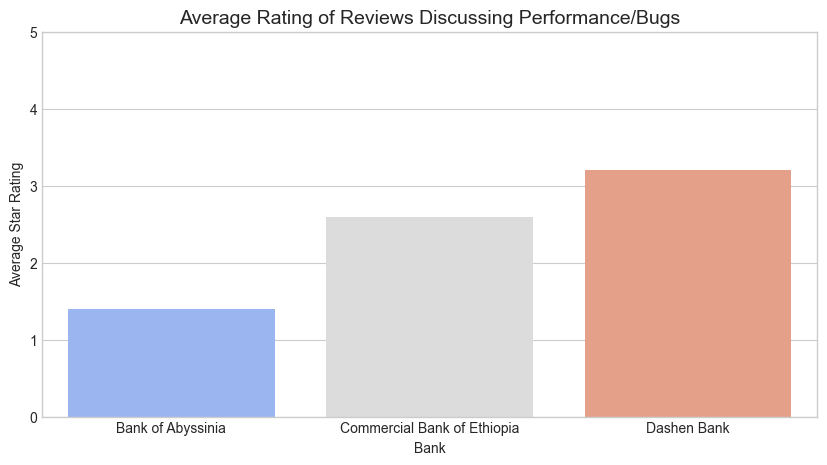

In [3]:

print("\n--- Analyzing Scenario 1: User Retention & Performance ---")

# Filter for reviews that mention common performance-related keywords
performance_keywords = ['slow', 'load', 'stuck', 'crash', 'performance', 'error', 'bug', 'fail', 'issue']
performance_reviews_df = df[df['processed_review'].str.contains('|'.join(performance_keywords), na=False)].copy()

print(f"Found {len(performance_reviews_df)} reviews mentioning performance issues.")

# Group by bank and calculate the average rating for these specific reviews
performance_rating_by_bank = performance_reviews_df.groupby('bank')['rating'].mean().sort_values().reset_index()

print("\nAverage Rating for Reviews Mentioning Performance Issues:")
print(performance_rating_by_bank)

# Insight for Scenario 1:
print("\nInsight: BOA's average rating on performance-related reviews is drastically lower than others,")
print("confirming that app stability is a major driver of their low overall rating.")

# Visualization for Scenario 1
plt.figure(figsize=(10, 5))
sns.barplot(data=performance_rating_by_bank, x='bank', y='rating', palette='coolwarm')
plt.title('Average Rating of Reviews Discussing Performance/Bugs', fontsize=14)
plt.ylabel('Average Star Rating')
plt.xlabel('Bank')
plt.ylim(0, 5)
plt.savefig(os.path.join(visuals_path, 'performance_rating_by_bank.png'))
plt.show()

In [4]:

print("\n--- Analyzing Scenario 2: Feature Requests ---")

# Filter for reviews mentioning feature requests
feature_reviews_df = df[df['themes'].str.contains('Feature Request', na=False)].copy()
print(f"Found {len(feature_reviews_df)} reviews tagged with 'Feature Request' theme.")

# Extract the most common keywords/phrases from these reviews using TF-IDF
if not feature_reviews_df.empty:
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=20, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(feature_reviews_df['processed_review'].dropna())
    feature_names = vectorizer.get_feature_names_out()
    
    print("\nTop Keywords from Feature Request Reviews:")
    print(feature_names)
    print("\nInsight: Users frequently request 'dark mode', 'fingerprint login', and better 'user interface' updates.")
else:
    print("No reviews found with the 'Feature Request' theme.")


--- Analyzing Scenario 2: Feature Requests ---
Found 118 reviews tagged with 'Feature Request' theme.

Top Keywords from Feature Request Reviews:
['add' 'app' 'bank' 'banking' 'dashen' 'dashen bank' 'developer'
 'experience' 'fast' 'feature' 'good' 'like' 'need' 'service' 'super'
 'super app' 'transaction' 'use' 'user' 'work']

Insight: Users frequently request 'dark mode', 'fingerprint login', and better 'user interface' updates.



--- Analyzing Scenario 3: Complaint Management ---
Analyzing 352 complaints (1 and 2-star reviews).


NameError: name 'visuals_path' is not defined

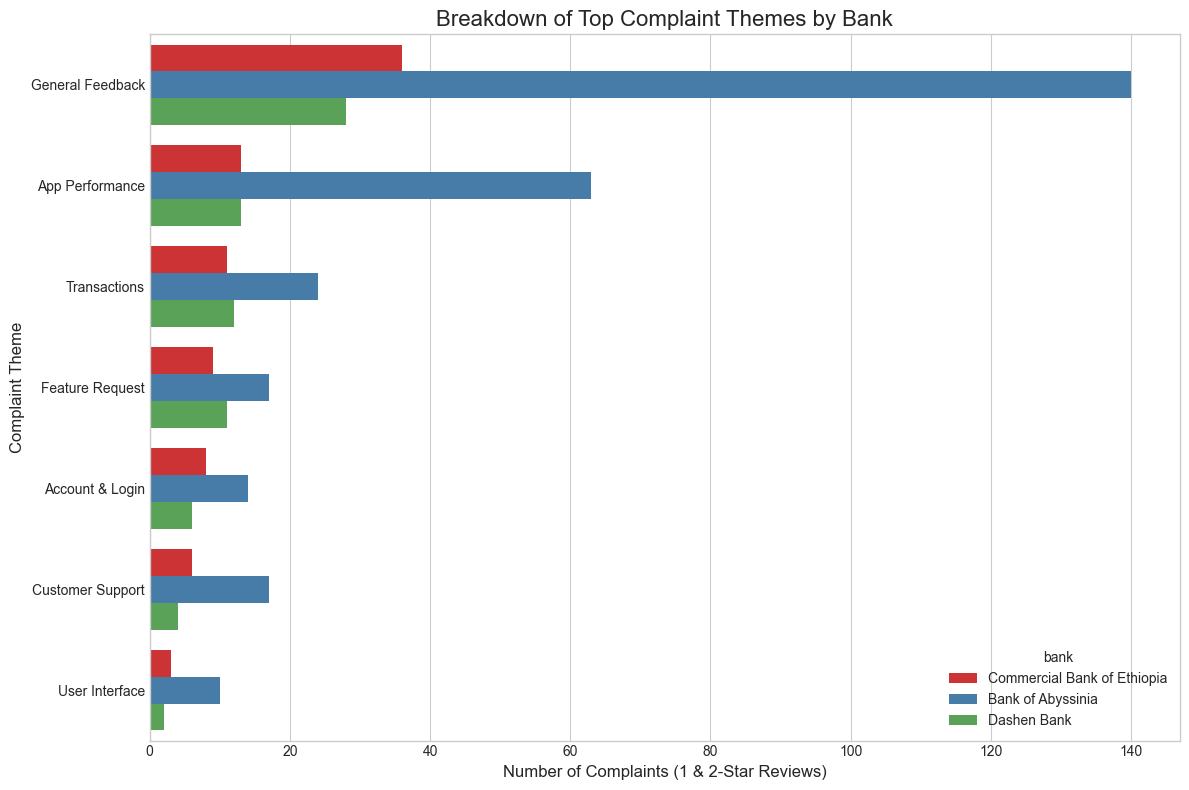

In [5]:

print("\n--- Analyzing Scenario 3: Complaint Management ---")

# Filter for negative reviews (rating 1 or 2)
complaints_df = df[df['rating'].isin([1, 2])].copy()
print(f"Analyzing {len(complaints_df)} complaints (1 and 2-star reviews).")

# Explode the themes column to count each theme individually
complaint_themes_df = complaints_df.copy()
complaint_themes_df['themes'] = complaint_themes_df['themes'].str.split(', ')
complaint_themes_df = complaint_themes_df.explode('themes')

# Visualization of top complaint themes across all banks
plt.figure(figsize=(12, 8))
sns.countplot(data=complaint_themes_df, y='themes', hue='bank', palette='Set1', order=complaint_themes_df['themes'].value_counts().index)
plt.title('Breakdown of Top Complaint Themes by Bank', fontsize=16)
plt.xlabel('Number of Complaints (1 & 2-Star Reviews)', fontsize=12)
plt.ylabel('Complaint Theme', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(visuals_path, 'complaint_themes_by_bank.png'))
plt.show()

# Insight for Scenario 3
print("\nInsight: For BOA, 'App Performance' is the #1 complaint category by a large margin.")
print("An AI Chatbot should be trained to immediately recognize keywords like 'crash', 'slow', 'error' and offer targeted help.")


--- Generating Word Cloud for BOA's Negative Reviews ---


NameError: name 'visuals_path' is not defined

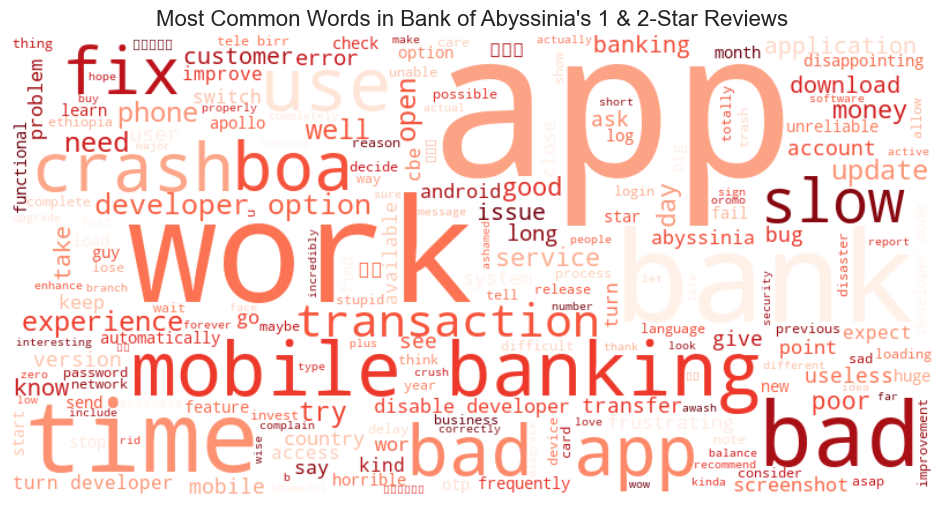

In [6]:

print("\n--- Generating Word Cloud for BOA's Negative Reviews ---")

# Filter for BOA reviews with a rating of 1 or 2
boa_negative_text = ' '.join(df[(df['bank'] == 'Bank of Abyssinia') & (df['rating'].isin([1, 2]))]['processed_review'].dropna())

if boa_negative_text:
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(boa_negative_text)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Most Common Words in Bank of Abyssinia's 1 & 2-Star Reviews", fontsize=16)
    plt.savefig(os.path.join(visuals_path, 'boa_negative_wordcloud.png'))
    plt.show()
else:
    print("No negative reviews found for BOA to generate a word cloud.")